# 9.6  Seção de Laboratório: Máquinas de Vetores de Suporte

## Classificador de Vetor de Suporte

Utilizaremos a biblioteca **scikit-learn** nesta seção de laboratório.

A função **sklearn.svm.SVC** pode ser utilizada para ajustar um classificador de vetor de suporte quando o argumento kernel = "linear" (núcleo linear) for usado. Um argumento **custo** nos permite especificar o custo de uma violação à margem. Quando o custo é pequeno, as margens serão maiores e muitos vetores de suporte estarão nela ou a violarão. Quando o custo é grande, as margem serão menores e existirão poucos vetores de suporte nela ou a violando.

Agora demonstraremos o uso desta função em um exemplo bidimensional,  para que possamos colocar em um gráfico a fronteira de decisão resultante. Começaremos gerando as observações, as quais pertencem a duas classes, e checaremos se as classes são linearmente separáveis ou não. 

In [2]:
import numpy as np
from sklearn import svm

In [3]:
np.random.seed(42) #makes the random numbers predictable

In [4]:
x = np.zeros([20,2])

In [5]:
lenght = len(x)

In [6]:
for i in range (0,20,1):
    for j in range (0,2,1):
        x[i][j] = np.random.randn(1) 

In [7]:
for i in range (9,20,1):
    for j in range (0,2,1):
        x[i][j] = x[i][j] + 1

In [8]:
y = np.repeat([1,-1], 10)

In [9]:
import matplotlib.pyplot as plt

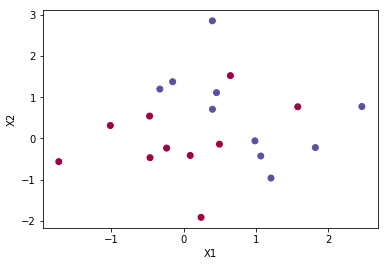

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=(3-y), cmap='Spectral'); 
plt.xlabel('X1')
plt.ylabel('X2');

As classes não são linearmente separáveis. Em seguida, ajustaremos o classificador de vetor de suporte. 

In [11]:
clf = svm.SVC(kernel='linear',C=10)  #C-support vector classification

In [12]:
clf.fit(x,y) #training the model

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

Agora, geraremos o gráfico do classificador de vetor de suporte obtido.

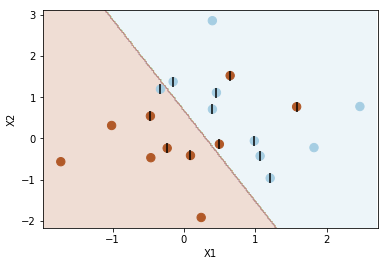

Number of support vectors:  13


In [14]:
plot_svc(clf, x, y)

A região do espaço de recurso que será atribuída à classe +1 é mostrada em azul, e a região que será atribuída à classe -1 é mostrada em vermelho. A fronteira de decisão entre as duas classes é linear (pois kernel = "linear). Note que aqui o segundo recurso é utilizado no eixo x e a primeira no eixo y, em contraste com o comportamento do gráfico normalmente utilizado em Python. Os vetores de suporte são colocados como círculos hachurados e as observações restantes são colocadas como círculos; aqui vemos que há 13 vetores de suporte.

E se usássemos um valor menor do parâmetro custo? 

In [15]:
clf2 = svm.SVC(kernel='linear',C=0.01)

clf2.fit(x,y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

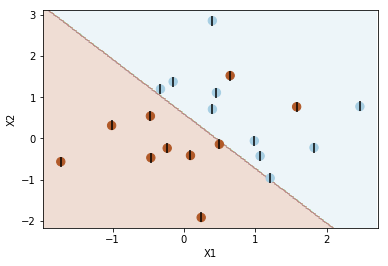

Number of support vectors:  20


In [16]:
plot_svc(clf2,x,y)

Agora que o parâmetro de custo é menor, obtemos um número maior de vetores de suporte, pois a margem é maior. 

Agora, vamos prever os rótulos das classes destas observações de teste.

In [17]:
import pandas as pd

dat = pd.DataFrame(x,y)

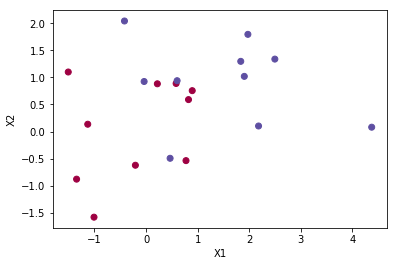

In [18]:

xtest = np.zeros([20,2])

for i in range (0,20,1):
    for j in range (0,2,1):
        xtest[i][j] = np.random.randn(1)
        
ytest = np.zeros([20])


for i in range(0,20,1):
    if(i<10):
        ytest[i] = -1
    else:
        ytest[i] = 1
        
for i in range (9,20,1):
    for j in range (0,2,1):
        xtest[i][j] = xtest[i][j] + 1

plt.scatter(xtest[:,0], xtest[:,1], c=ytest, cmap='Spectral')
plt.xlabel('X1')
plt.ylabel('X2');

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
ypred = clf.predict(xtest)
pd.DataFrame(confusion_matrix(ytest, ypred),index=clf.classes_, columns=clf.classes_)

,-1,1
-1,5,5
1,9,1


Agora, com o custo C = 10, apenas 6 das observações foram corretamente classificadas. 

In [21]:
ypred2 = clf2.predict(xtest)
pd.DataFrame(confusion_matrix(ytest, ypred2),index=clf2.classes_, columns=clf2.classes_)

,-1,1
-1,4,6
1,9,1


Com C = 0,01, uma observação adicional é classificada incorretamente. 

Agora considere uma situação na qual as duas classes são linearmente separáveis. Podemos então encontrar um hiperplano separador. Primeiramente, separamos as duas classes nos nossos dados simulados, tais que eles sejam linearmente separáveis.

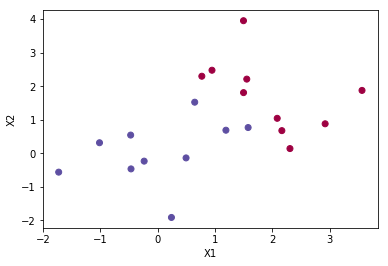

In [22]:
for i in range (9,20,1):
    for j in range (0,2,1):
        x[i][j] = x[i][j] + 1.1

plt.scatter(x[:,0], x[:,1], c=(y+5)/2, cmap='Spectral')
plt.xlabel('X1')
plt.ylabel('X2');

Agora as observações são separáveis. Ajustamos o classificador de vetor de suporte e traçamos o hiperplano separador, utilizando um valor muito alto de custo, tal que não haja observações classificadas de forma errada. 

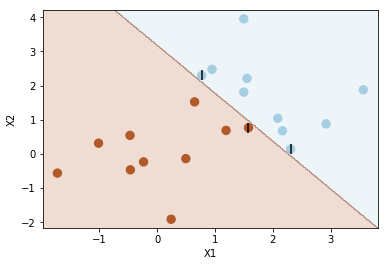

Number of support vectors:  3


In [23]:
clf4 = svm.SVC(kernel='linear',C=100000)
clf4.fit(x,y)
plot_svc(clf4,x,y)

Não obtivemos erros de treino e apenas três vetores de suporte foram utilizados. No entanto, a margem é muito pequena, e provavelmente este modelo terá uma performance ruim nos dados de teste. 

In [24]:
ypred4 = clf.predict(xtest)
pd.DataFrame(confusion_matrix(ytest, ypred4),index=clf4.classes_, columns=clf4.classes_)

,-1,1
-1,5,5
1,9,1


De fato, há uma performance ruim nos dados de testes. 

##  Máquina de Vetor de Suporte

Para ajustarmos um SVM utilizando um núcleo não-linear, utilizamos novamente a função **sklearn.svm.SVC**. No entanto, agora utilizaremos um parâmetro diferente para o núcleo (radial). Para ajustarmos um SVM com núcleo radial utilizamos  To fit a SVM with a radial kernel we use *kernel = 'radial'* e o argumento *gammma* para especificar um valor de $γ$ para o núcleo radial.

Primeiramente, geraremos dados com uma fronteira de classes não-linear:

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
np.random.seed(42)

In [27]:
x1= np.zeros([200,2])

In [28]:
for i in range (0,200,1):
    for j in range(0,2,1):
        x1[i][j] = np.random.randn(1)

In [29]:
for i in range (0,100,1):
    for j in range (0,2,1):
        x1[i][j] = x1[i][j] + 2 

In [30]:
for i in range (100,150,1):
    for j in range (0,2,1):
        x1[i][j] = x1[i][j] - 2  

In [31]:
y1 = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])   

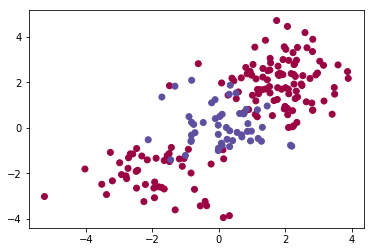

In [32]:
plt.scatter(x1[:, 0], x1[:, 1], c=y1, cmap='Spectral'); 

Observando o gráfico com os dados, torna-se claro que a fronteira é não-linear. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.5, random_state=2)

Os dados são aleatoriamente separados entre grupos de treino e de teste. Então, ajustamos os dados de treino utilizando a função sklearn.svm.SVC com um kernel radial e $γ$ =1:

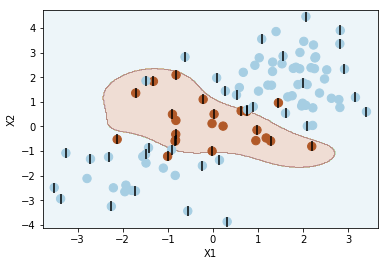

Number of support vectors:  50


In [34]:
svmfit = svm.SVC(C=1.0, kernel='rbf', gamma=1)
svmfit.fit(X_train, y_train)

plot_svc(svmfit,X_train,y_train)

O gráfico acima demonstra que a SVM resultante possui uma fronteira não-linear. 

Podemos observar que há muitos erros de treino neste ajuste. Se aumentarmos o valor do custo, podemos reduzir o número de erros. No entanto, isto vem com o preço de uma fronteira de decisão mais irregular, o que traz o risco de haver um sobreajuste nos dados.

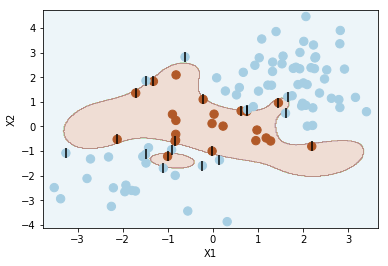

Number of support vectors:  22


In [35]:
svmfit2 = svm.SVC(C=100000, kernel='rbf', gamma=1)
svmfit2.fit(X_train, y_train)

plot_svc(svmfit2,X_train,y_train)

## Curvas ROC

De skearn.metrics.roc_curve podemos produzir curvas ROC.

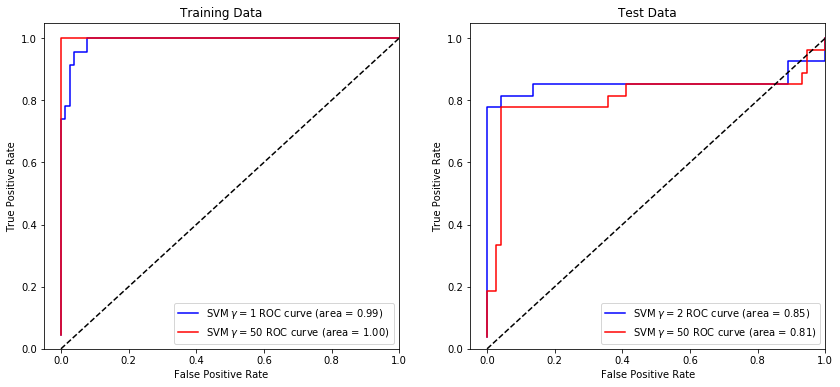

In [54]:
from sklearn.metrics import roc_curve, auc

svm3 = svm.SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train,y_train)

svm4 = svm.SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train,y_train)

y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 2$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

Para os dados de treino, vemos que o SVM produziu predições acuradas. Ao aumentarmos o valor de gamma, produzimos um ajuste mais flexível e geramos melhorias na acurácia. 
<br></br>
<br></br>
No entanto, estas curvas ROC estão todas nos dados de treino. Estamos mais interessados no nível de acurácia de predição nos dados de teste, e vemos que a performance do SVM neste caso é menor, e que o valor de gamma igual a 2 produz melhores resultados.

## Máquinas de Vetores de Suporte com Múltiplas Classes 

Se a resposta for um fator contendo mais de duas classes, então a função realizará classificação multiclasse utilizando a abordagem um-versus-um. Exploraremos este contexto ao gerar uma terceira classe de observações. 

In [36]:
np.random.seed(42)

In [37]:
xx = np.zeros([50,2])

for i in range (0,50,1):
    for j in range(0,2,1):
        xx[i][j] = np.random.randn(1)


xxx = np.concatenate([x,xx])

In [38]:
yy = np.repeat(0,50)
yyy = np.concatenate([y,yy])

xxx[yyy==0] = xxx[yyy==0] + 4

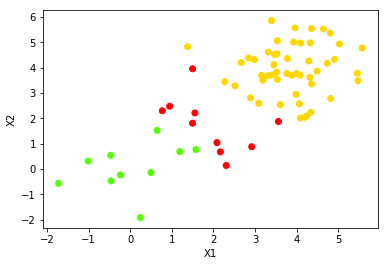

In [39]:
plt.scatter(xxx[:, 0], xxx[:, 1], c=yyy, cmap='prism'); 
plt.xlabel('X1')
plt.ylabel('X2');

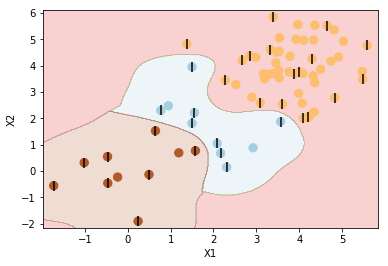

Number of support vectors:  33


In [40]:
svmmult = svm.SVC(C=10, kernel='rbf', gamma=1)
svmmult.fit(xxx, yyy)

plot_svc(svmmult,xxx,yyy)

## Aplicação aos Dados de Expressão Gênica

Agora examinaremos o conjunto de dados **Khan**, que consiste em um número de amostras de tecido correspondentes a quatro tipos distintos de células cancerosas. Para cada amostra de tecido, medidas de expressão gênica estão disponíveis. O conjunto de dada consiste em dados de treino, *d_xtrain* and *d_ytrain*, e dados de teste, *d_xtest* and *d_ytest*. 

In [41]:
%%capture
d_xtrain = pd.read_csv('Khan_xtrain.csv',index_col=0)

d_ytrain = pd.read_csv('Khan_ytrain.csv',index_col=0)

d_xtest = pd.read_csv('Khan_xtest.csv',index_col=0)

d_ytest = pd.read_csv('Khan_ytest.csv',index_col=0)

In [42]:
d_ytrain.iloc[:, 0].value_counts(sort=False)

1     8
2    23
3    12
4    20
Name: x, dtype: int64

In [43]:
d_ytest.iloc[:, 0].value_counts(sort=False)

1    3
2    6
3    6
4    5
Name: x, dtype: int64

In [44]:
d_xtrain.shape
d_xtest.shape

(20, 2308)

Este conjunto de dadoss consiste em medidas de expressão para 2308 genes. Os dados de treino e de teste consistem em 63 e 20 observações respectivamente. 

Utilizaremos uma abordagem de vetor de suporte para prever os subtipos de câncer utilizando medidas de expressão gênica. Neste conjunto de dados, há um valor alto de recursos relativo ao número de observações. Isso sugere que deveríamos utilizar um núcleo linear, pois a flexibilidade adicional de um núcleo polinominal ou radial é desnecessária. 

In [45]:
genfit = svm.SVC(C=10, kernel='linear')

In [46]:
genfit.fit(d_xtrain,d_ytrain.iloc[:, 0])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
d_ypred = genfit.predict(d_xtrain)

In [48]:
pd.DataFrame(confusion_matrix(d_ytrain,d_ypred),index=genfit.classes_, columns=genfit.classes_)

,1,2,3,4
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


Observamos que não há erros de treino. De fato, isto não é supreendente, pois o grande número de variáveis relativo ao número de observações implica que é fácil encontrar hiperplanos que separam as classes completamente. Mas, não estamos tão interessados na performance do classificador de vetor de suporte nas observações de treino, e sim nas performance das observações de teste. 

In [49]:
d_ypred2 = genfit.predict(d_xtest)

In [50]:
pd.DataFrame(confusion_matrix(d_ytest,d_ypred2),index=genfit.classes_, columns=genfit.classes_)

,1,2,3,4
1,3,0,0,0
2,0,6,0,0
3,0,2,4,0
4,0,0,0,5


Vemos que a utilização do custo C = 10 nos leva cometer a dois erros no conjunto de dados de teste. 